# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
!pip install dask[complete]

zsh:1: no matches found: dask[complete]


In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
import branca.colormap as cm
from sklearn import linear_model 
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmed_df = confirmed_df.iloc[:, :confirmed_df.columns.str.find("7/19/20").argmax()+1]
deaths_df = deaths_df.iloc[:, :deaths_df.columns.str.find("7/19/20").argmax()+1]
recoveries_df = recoveries_df.iloc[:, :recoveries_df.columns.str.find("7/19/20").argmax()+1]

## Have a look at the general data:

In [4]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/10/20  7/11/20  7/12/20  \
0        0        0        0        0  ...    34280    34437    34537   
1        0        0        0        0  ...     3278     3371     3454   
2        0        0        0        0  ...    18242    18712    19195   
3        0        0        0        0  ...      855      855      855   
4        0        0        0        0  ...      458      462      506   

   7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  
0    34541    34826    35026    35156    35315    35375    35561  
1     3571     3667     3752     3851     3906     4008     4090  
2    19689    20216    20770    21355    21948    22549    23084  
3      858      861      862      877      880      880      880  
4      525      541      576      607      638      687      705  

[5 rows x 184 columns]

In [5]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/10/20  7/11/20  7/12/20  \
0        0        0        0        0  ...      975      979     1014   
1        0        0        0        0  ...       85       89       93   
2        0        0        0        0  ...      996     1004     1011   
3        0        0        0        0  ...       52       52       52   
4        0        0        0        0  ...       23       23       26   

   7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  
0     1016     1049     1098     1117     1151     1151     1185  
1       95       97      101      104      107      111      112  
2     1018     1028     1040     1052     1057     1068     1078  
3       52       52       52       52       52       52       52  
4       26       26       27       28       29       29       29  

[5 rows x 184 columns]

In [6]:
recoveries_df.head()

confirmed_df.iloc[40, 5:] = (confirmed_df.iloc[40:56, 5:].sum())
deaths_df.iloc[40, 5:] = (deaths_df.iloc[40:56, 5:].sum())

confirmed_df = confirmed_df.drop(confirmed_df.index[41:56], axis = 0)
confirmed_df.index = range(len(confirmed_df))

deaths_df = deaths_df.drop(deaths_df.index[41:56], axis = 0)
deaths_df.index = range(len(confirmed_df))

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [7]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()


total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])
#Insert your code here:
for i in range(len(dates)):
    total_cases.append(confirmed[dates[i]].sum())
    total_deaths.append(deaths[dates[i]].sum())
    total_recovered.append(recoveries[dates[i]].sum())
    total_active.append(total_cases[i]-total_deaths[i]-total_recovered[i])

In [8]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])


Total confirmed cases:  14505270
Total death cases:  655135
Total recoveries cases:  8133881
Total active cases:  5716254


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

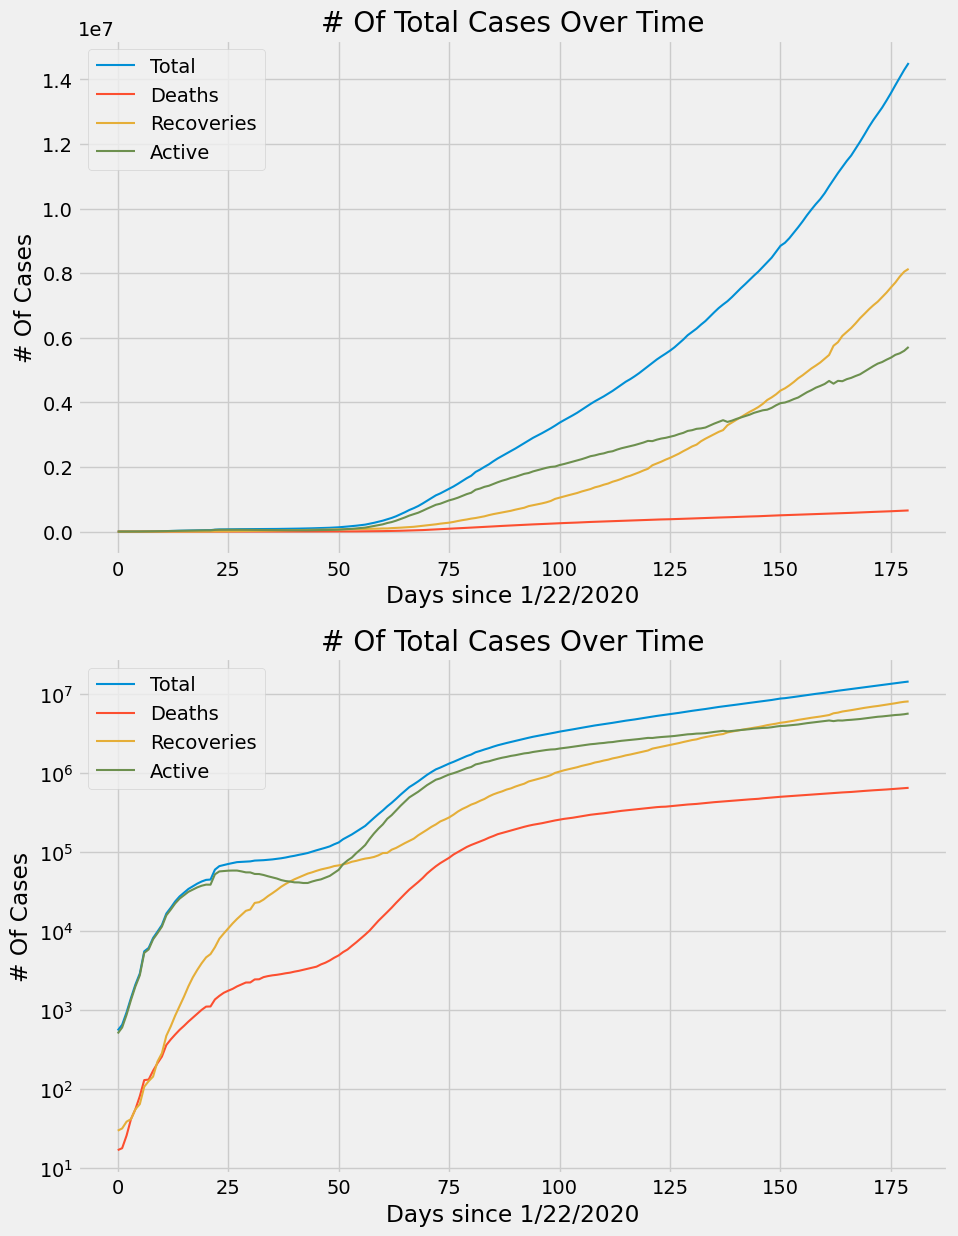

In [9]:
#Insert your code here:
#Create a subplots with height 2
figure, axis = plt.subplots(2, 1, figsize = (10, 14))

#Plot 1 with no log10
axis[0].set_title("# Of Total Cases Over Time")
axis[0].set_xlabel("Days since 1/22/2020")
axis[0].set_ylabel("# Of Cases")
axis[0].plot(adjusted_dates, total_cases, linewidth = 1.5, label = "Total")
axis[0].plot(adjusted_dates, total_deaths, linewidth = 1.5, label = "Deaths")
axis[0].plot(adjusted_dates, total_recovered, linewidth = 1.5, label = "Recoveries")
axis[0].plot(adjusted_dates, total_active, linewidth = 1.5, label = "Active")
axis[0].legend(loc = "upper left")

#Plot 2 with log10
axis[1].set_title("# Of Total Cases Over Time")
axis[1].set_xlabel("Days since 1/22/2020")
axis[1].set_ylabel("# Of Cases")
axis[1].plot(adjusted_dates, total_cases, linewidth = 1.5, label = "Total")
axis[1].plot(adjusted_dates, total_deaths, linewidth = 1.5, label = "Deaths")
axis[1].plot(adjusted_dates, total_recovered, linewidth = 1.5, label = "Recoveries")
axis[1].plot(adjusted_dates, total_active, linewidth = 1.5, label = "Active")
axis[1].legend(loc = "upper left")
axis[1].set_yscale("log")

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

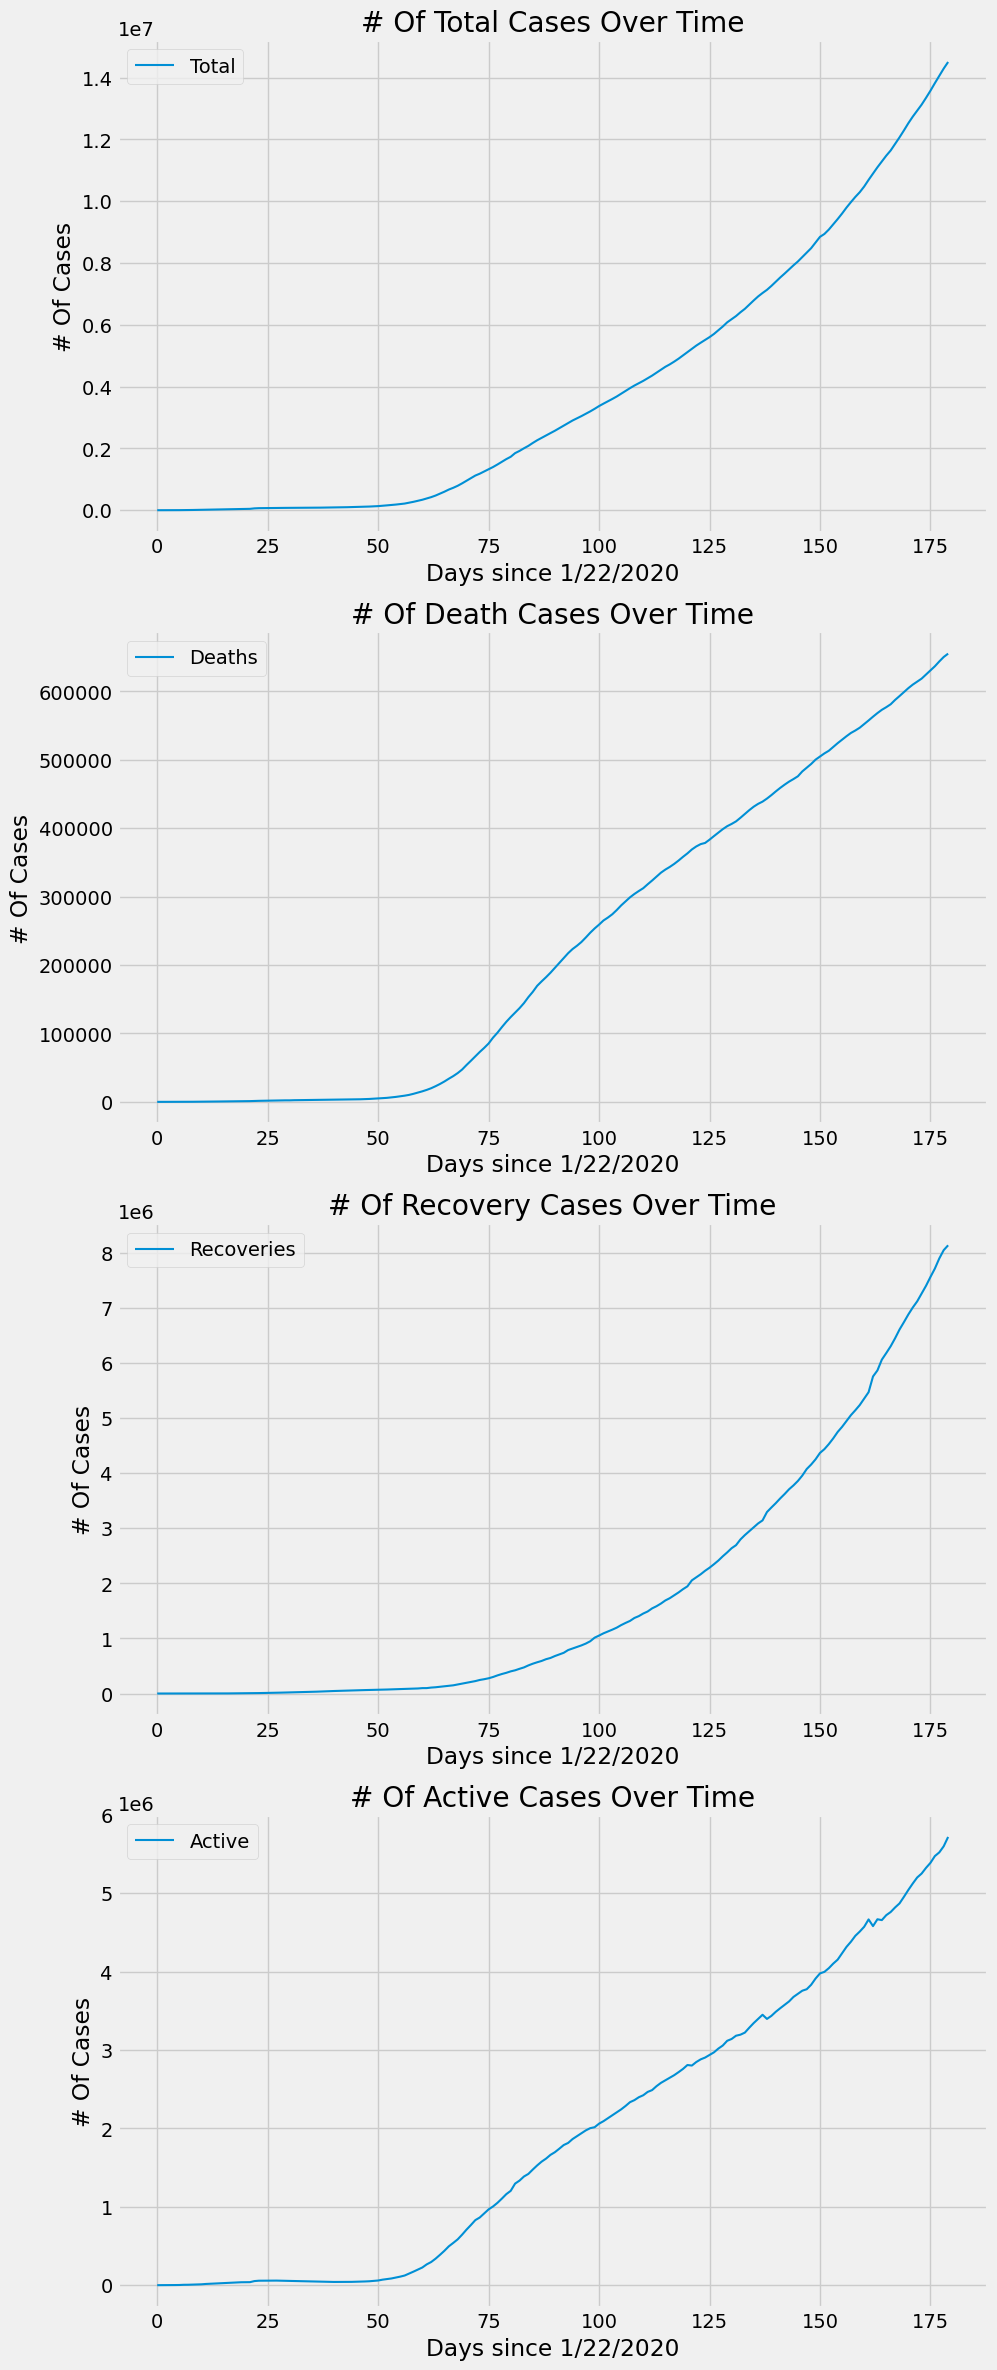

In [10]:
#Insert your code here:
#Create a subplots with height 4
figure, axis = plt.subplots(4, 1, figsize = (10, 7*4))

#Plot 1 with no log10
axis[0].set_title("# Of Total Cases Over Time")
axis[0].set_xlabel("Days since 1/22/2020")
axis[0].set_ylabel("# Of Cases")
axis[0].plot(adjusted_dates, total_cases, linewidth = 1.5, label = "Total")
axis[0].legend(loc = "upper left")

axis[1].set_title("# Of Death Cases Over Time")
axis[1].set_xlabel("Days since 1/22/2020")
axis[1].set_ylabel("# Of Cases")
axis[1].plot(adjusted_dates, total_deaths, linewidth = 1.5, label = "Deaths")
axis[1].legend(loc = "upper left")

axis[2].set_title("# Of Recovery Cases Over Time")
axis[2].set_xlabel("Days since 1/22/2020")
axis[2].set_ylabel("# Of Cases")
axis[2].plot(adjusted_dates, total_recovered, linewidth = 1.5, label = "Recoveries")
axis[2].legend(loc = "upper left")

axis[3].set_title("# Of Active Cases Over Time")
axis[3].set_xlabel("Days since 1/22/2020")
axis[3].set_ylabel("# Of Cases")
axis[3].plot(adjusted_dates, total_active, linewidth = 1.5, label = "Active")
axis[3].legend(loc = "upper left")



## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [11]:
daily_cases = [0]
daily_deaths = [0]
daily_recovered = [0]
daily_active = [0]

for i in range(1, len(dates)):
    if total_cases[i] >= total_cases[i-1]:
        daily_cases.append(total_cases[i]-total_cases[i-1])
    else:
        daily_cases.append(0)
        
    if total_deaths[i] >= total_deaths[i-1]:
        daily_deaths.append(total_deaths[i]-total_deaths[i-1])
    else:
        daily_deaths.append(0)
        
    if total_recovered[i] >= total_recovered[i-1]:
        daily_recovered.append(total_recovered[i]-total_recovered[i-1])
    else:
        daily_recovered.append(0)
        
    if total_active[i] >= total_active[i-1]:
        daily_active.append(total_active[i]-total_active[i-1])
    else:
        daily_active.append(0)
        

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

<BarContainer object of 180 artists>

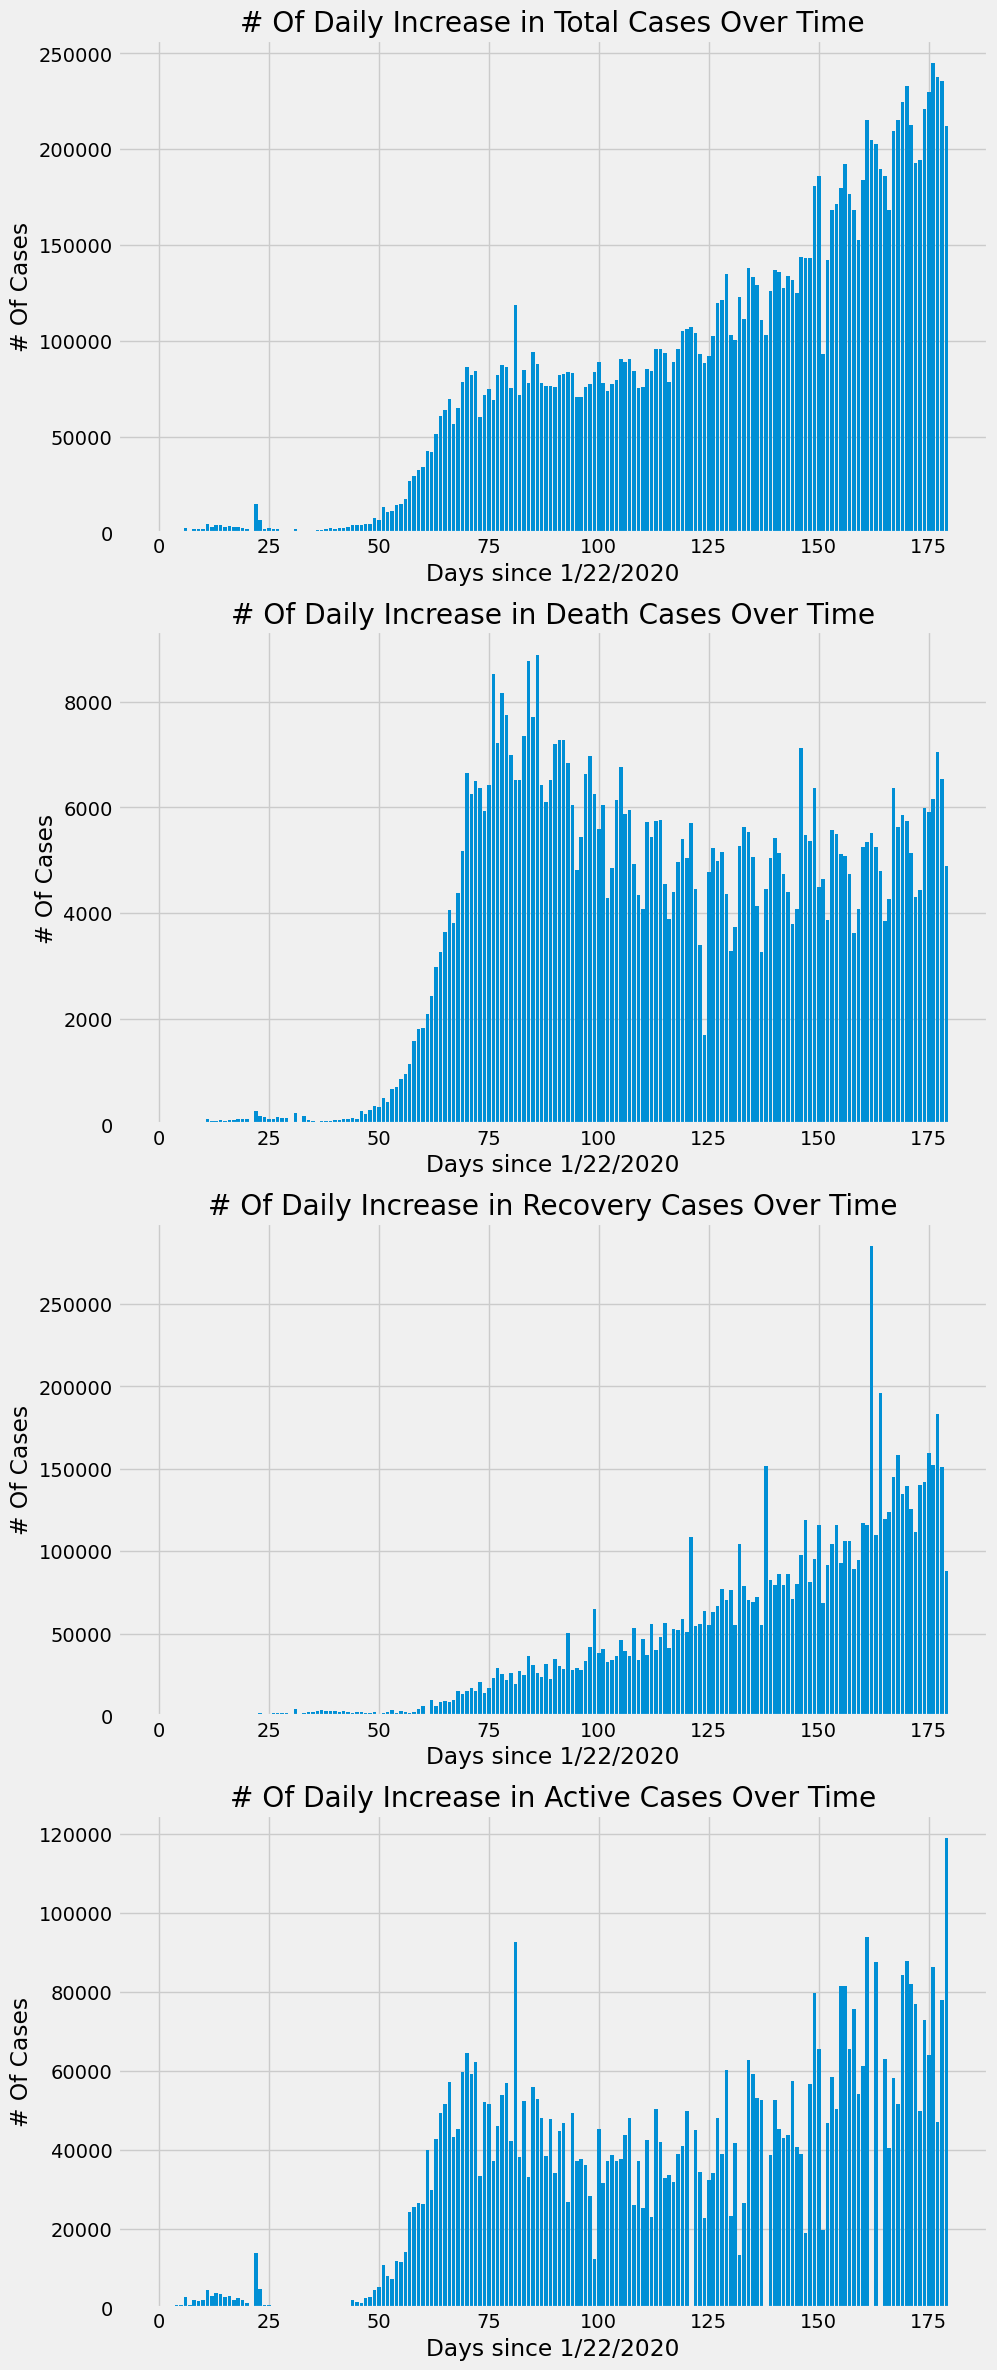

In [12]:
#Insert your code here:
#Create a subplots with height 4
figure, axis = plt.subplots(4, 1, figsize = (10, 4*7))

#Plot 1 with no log10
axis[0].set_title("# Of Daily Increase in Total Cases Over Time")
axis[0].set_xlabel("Days since 1/22/2020")
axis[0].set_ylabel("# Of Cases")
axis[0].bar(adjusted_dates, daily_cases, label = "Total")

#Plot 2 with no log10
axis[1].set_title("# Of Daily Increase in Death Cases Over Time")
axis[1].set_xlabel("Days since 1/22/2020")
axis[1].set_ylabel("# Of Cases")
axis[1].bar(adjusted_dates, daily_deaths, label = "Total")

#Plot 3 with no log10
axis[2].set_title("# Of Daily Increase in Recovery Cases Over Time")
axis[2].set_xlabel("Days since 1/22/2020")
axis[2].set_ylabel("# Of Cases")
axis[2].bar(adjusted_dates, daily_recovered, label = "Total")

#Plot 4 with no log10
axis[3].set_title("# Of Daily Increase in Active Cases Over Time")
axis[3].set_xlabel("Days since 1/22/2020")
axis[3].set_ylabel("# Of Cases")
axis[3].bar(adjusted_dates, daily_active, label = "Total")

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [13]:
#Insert your code here:
mortality_rate = []
recovered_rate = []
for i in range(len(dates)):
    mortality_rate.append(total_deaths[i]/total_cases[i]*100)
    recovered_rate.append(total_recovered[i]/total_cases[i]*100)

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

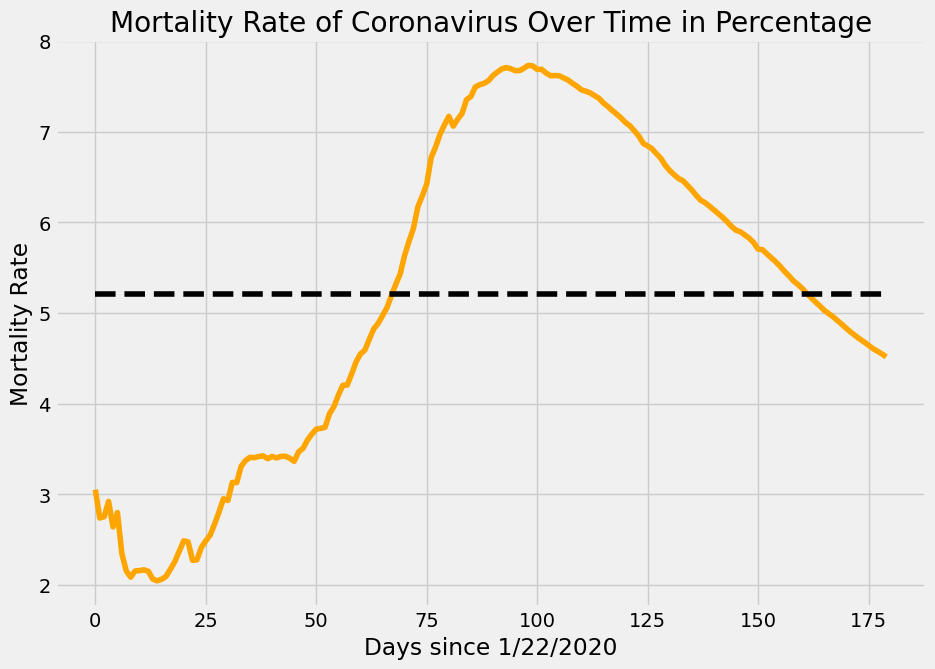

In [14]:
#Insert your code here:
figure, axis = plt.subplots(1, 1, figsize = (10, 1*7))

mean = np.full(len(dates), np.mean(mortality_rate))
axis.set_title("Mortality Rate of Coronavirus Over Time in Percentage")
axis.set_xlabel("Days since 1/22/2020")
axis.set_ylabel("Mortality Rate")
axis.plot(adjusted_dates, mortality_rate, label = "Mortality Rate", color = "orange")
axis.plot(adjusted_dates, mean, label = "Average", color = "black", linestyle = "dashed")


**7.2** 

    Visualize the recovery rate in by time (day units) using the line chart.

    Using the dashline to visualize the average recovery rate of all the time.

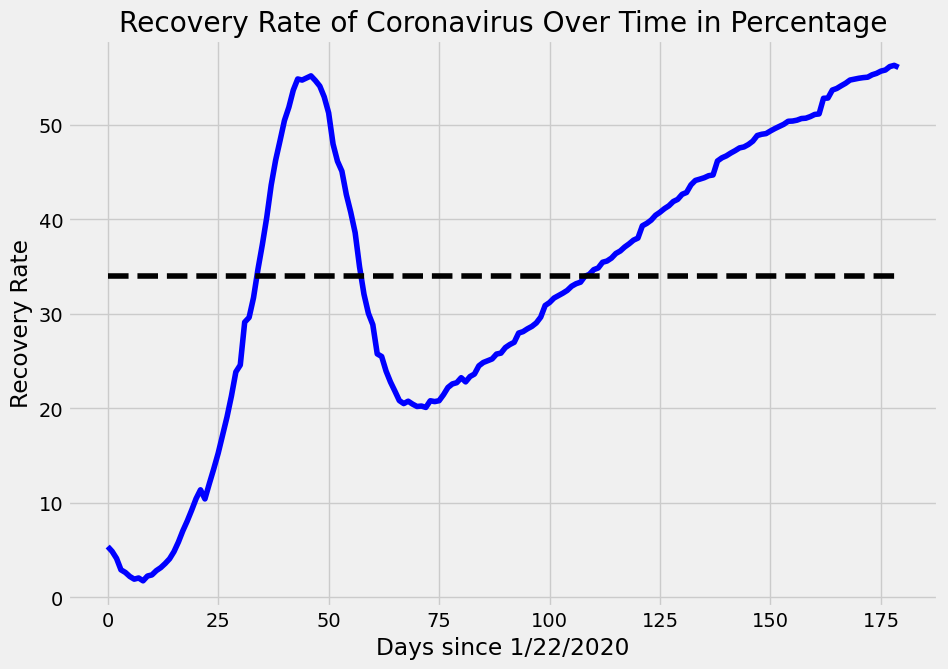

In [15]:
#Insert your code here:
figure, axis = plt.subplots(1, 1, figsize = (10, 1*7))

mean = np.full(len(dates), np.mean(recovered_rate))
axis.set_title("Recovery Rate of Coronavirus Over Time in Percentage")
axis.set_xlabel("Days since 1/22/2020")
axis.set_ylabel("Recovery Rate")
axis.plot(adjusted_dates, recovered_rate, label = "Mortality Rate", color = "blue")
axis.plot(adjusted_dates, mean, label = "Average", color = "black", linestyle = "dashed")


#  5. Continent Analysis

## Data Prerocessing

In [16]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}
# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(str(country)))
    except:
        return 'na'


    



# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [17]:
#Insert your code here:
def continent_code_to_list(countries):
    temp_list = []
    for i in range(len(countries)):
        temp_list.append(continents[country_to_continent_code(countries[i])])
    return temp_list
                         
confirmed_df.insert(2, "Continent", continent_code_to_list(countries), True)
deaths_df.insert(2, "Continent", continent_code_to_list(countries1), True)
recoveries_df.insert(2, "Continent", continent_code_to_list(countries2), True)
confirmed_df.head()

Province/State Country/Region Continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/10/20  7/11/20  7/12/20  \
0        0        0        0        0  ...    34280    34437    34537   
1        0        0        0        0  ...     3278     3371     3454   
2        0        0        0        0  ...    18242    18712    19195   
3        0        0        0        0  ...      855      855      855   
4        0        0        0        0  ...      458      462      506   

   7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  
0    34541    34826    35026    35156    35315    35375    35561  
1     3571     3667     3752     3851     3906     4008     4090  
2    19689    20216    20770    21355    21948    22549    23084  
3      858      861      862      877      880      880      880  
4      525      541      576      607      638      687      705  

[5 rows x 185 columns]

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [18]:
#Insert your code here:
countries_df = pd.DataFrame(index = confirmed_df["Country/Region"])
countries_df["Lat"] = confirmed_df["Lat"].values
countries_df["Long"] = confirmed_df["Long"].values
countries_df["Continent"] = confirmed_df["Continent"].values
countries_df["Confirmed"] = confirmed_df[dates[-1]].values
countries_df["Deaths"] = deaths_df[dates[-1]].values
countries_df["Recoveries"] = recoveries[dates[-1]].values
countries_df["Actives"] = (confirmed_df[dates[-1]] - deaths_df[dates[-1]] - recoveries_df[dates[-1]]).values

def calculate_mortality_rate(deaths, confirmed):
    temp_list = np.array([])
    for i in range(len(confirmed_df["Lat"])):
        if confirmed[dates[-1]].iloc[i] > 0:
            temp_list = np.append(temp_list, deaths[dates[-1]].iloc[i] / confirmed[dates[-1]].iloc[i] * 100)
        else:
            temp_list = np.append(temp_list, 0)
    return np.around(temp_list, 2)


countries_df["Mortality Rate"] = calculate_mortality_rate(deaths_df, confirmed_df).tolist()
      

countries_df.head()

Lat       Long Continent  Confirmed  Deaths  Recoveries  \
Country/Region                                                                 
Afghanistan     33.93911  67.709953      Asia      35561    1185       23634   
Albania         41.15330  20.168300    Europe       4090     112        2311   
Algeria         28.03390   1.659600    Africa      23084    1078       16051   
Andorra         42.50630   1.521800    Europe        880      52         803   
Angola         -11.20270  17.873900    Africa        705      29         221   

                Actives  Mortality Rate  
Country/Region                           
Afghanistan       10742            3.33  
Albania            1667            2.74  
Algeria            5955            4.67  
Andorra              25            5.91  
Angola              455            4.11

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [19]:
continent_list = ["Africa", "Asia", "Australia", "Europe", "North America", "South America", "Others"]

continents_df = pd.DataFrame(columns = ["Confirmed", "Deaths", "Recoveries", "Actives"])
mor_rate = []

for i in range(len(continent_list)):
    continent = countries_df.loc[countries_df["Continent"] == continent_list[i]]
    sum = np.array([])
    sum = np.append(sum, continent.iloc[:, 3:-1].sum().values)
    continents_df.loc[len(continents_df)] = sum
    
for i in range(len(continents_df)):
    mor_rate = np.append(mor_rate, float(continents_df.iloc[i, 1]) / float(continents_df.iloc[i, 0]) * 100)

continents_df["Continent"] = continent_list
continents_df.set_index("Continent", inplace = True)
continents_df["Mortality Rate"] = mor_rate

print(continents_df)

               Confirmed    Deaths  Recoveries    Actives  Mortality Rate
Continent                                                                
Africa          721049.0   15169.0    380245.0   325635.0        2.103741
Asia           3396986.0   80203.0   2411307.0   905476.0        2.361005
Australia        13666.0     146.0      9927.0     3593.0        1.068345
Europe         2658403.0  210700.0   1535087.0   912616.0        7.925811
North America  4438206.0  194513.0   1584688.0  2659005.0        4.382694
South America  3261578.0  154186.0   2206775.0   900617.0        4.727344
Others           15382.0     218.0      5852.0     9312.0        1.417241


## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [20]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["Continent",continent]
    elif country != None:
        params = ["Country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

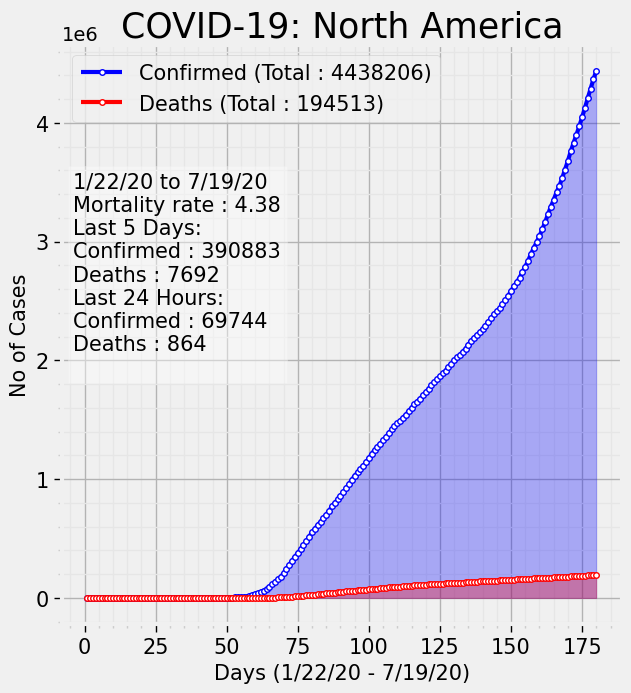

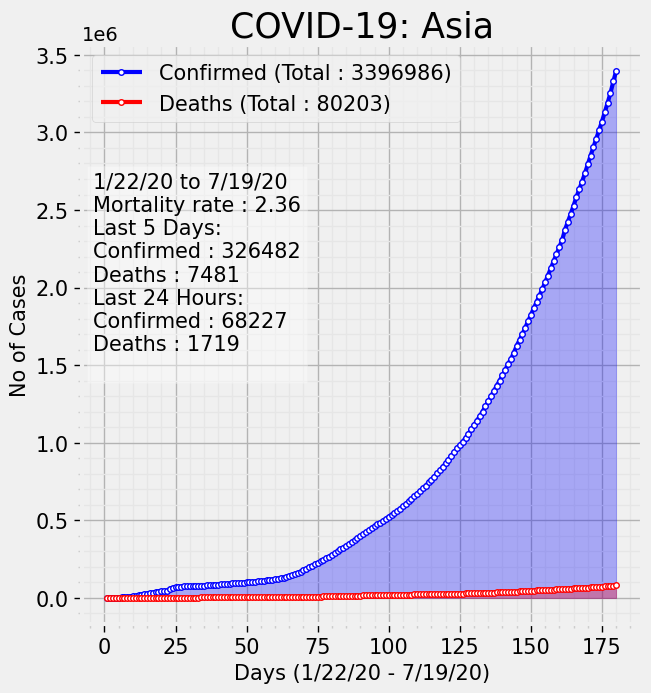

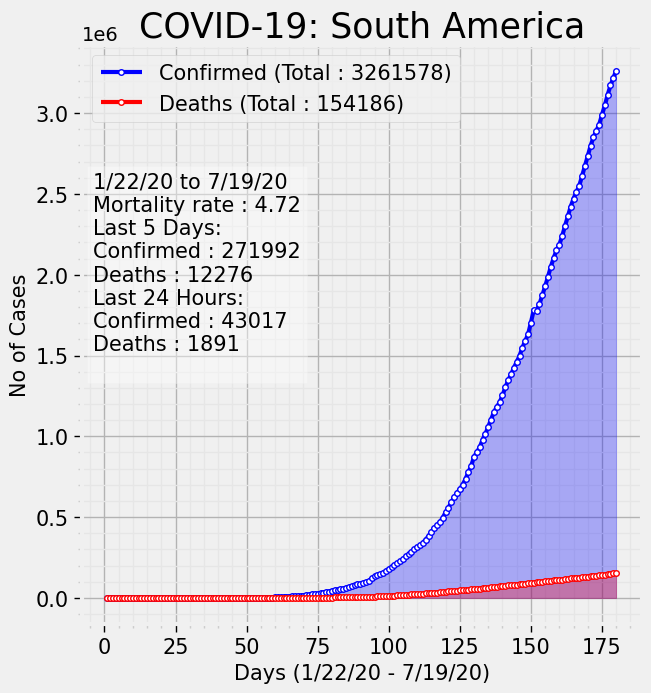

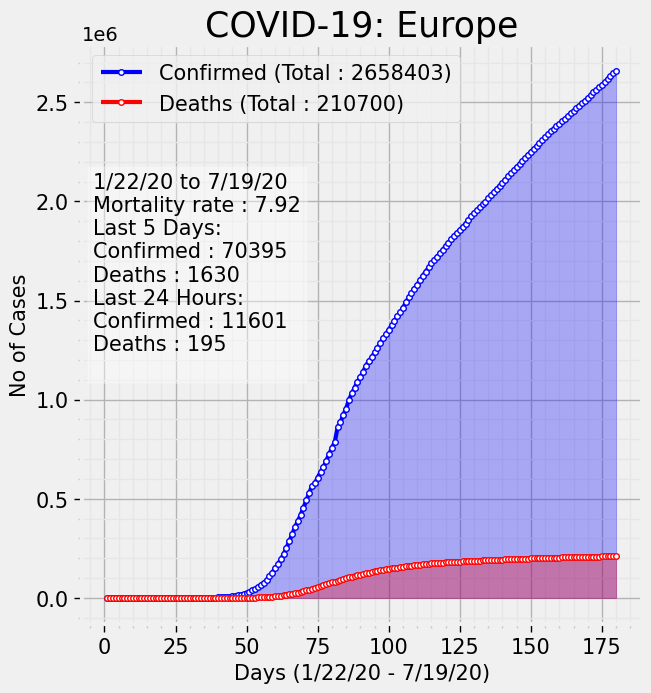

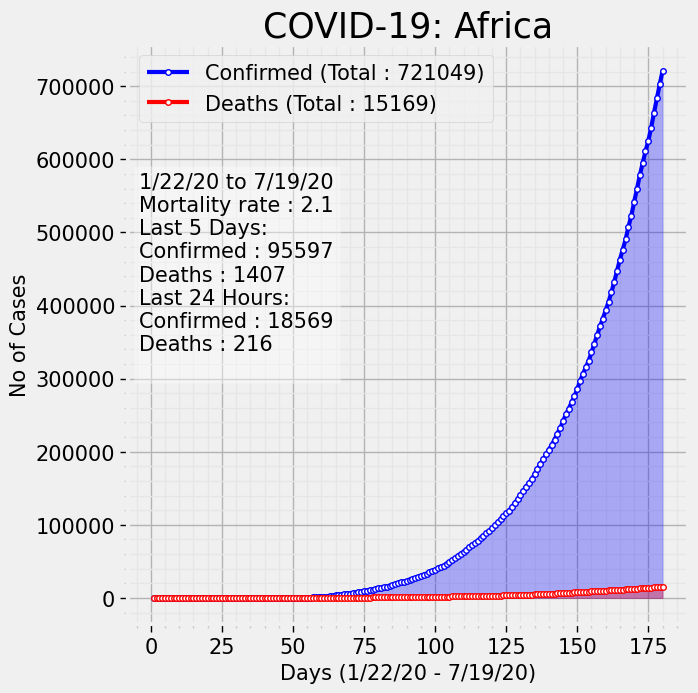

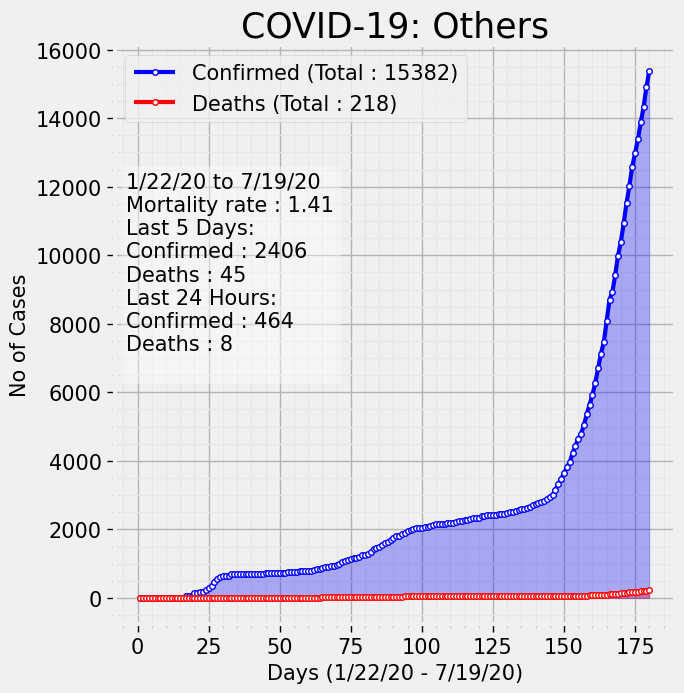

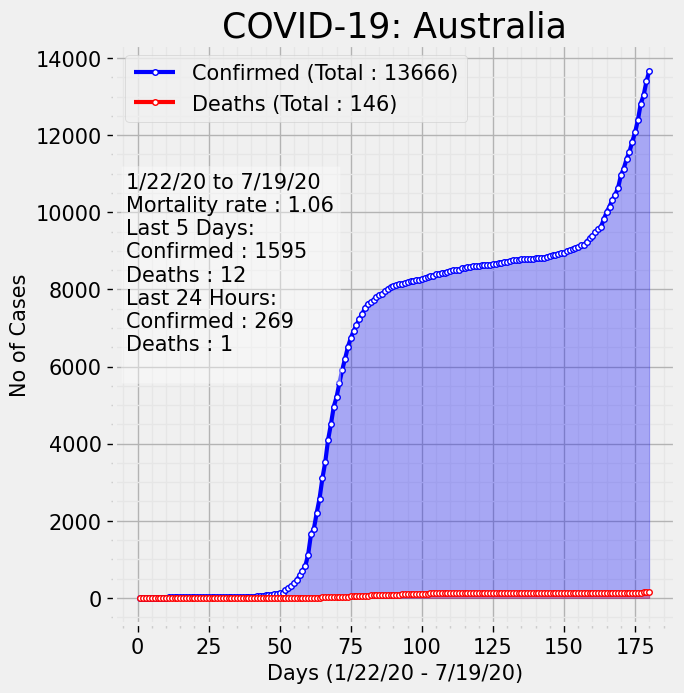

In [41]:
#Insert your code here:

def sort_confirmed_cases(df):
    continents = ['North America', 'South America', 'Asia', 'Australia', 'Africa', 'Europe', 'Others']
    temp_list = []
    for i in range(len(continents)):
        continent_df = confirmed_df.loc[confirmed_df["Continent"]==continents[i]]
        columns = dates[-1]
        temp_list.append([continent_df[columns].sum(), continents[i]])
    temp_list.sort(key=lambda x:x[0], reverse = True)
    return temp_list

def input_visualize_covid_cases(continent: list):
    for i in range(len(continent)):
        visualize_covid_cases(confirmed_df, deaths_df, continent[i][1])
        
input_visualize_covid_cases(sort_confirmed_cases(confirmed_df))



**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

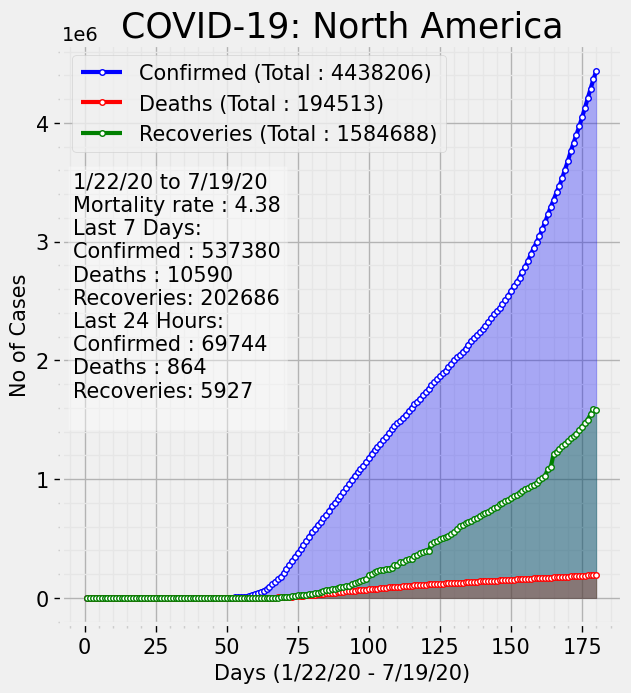

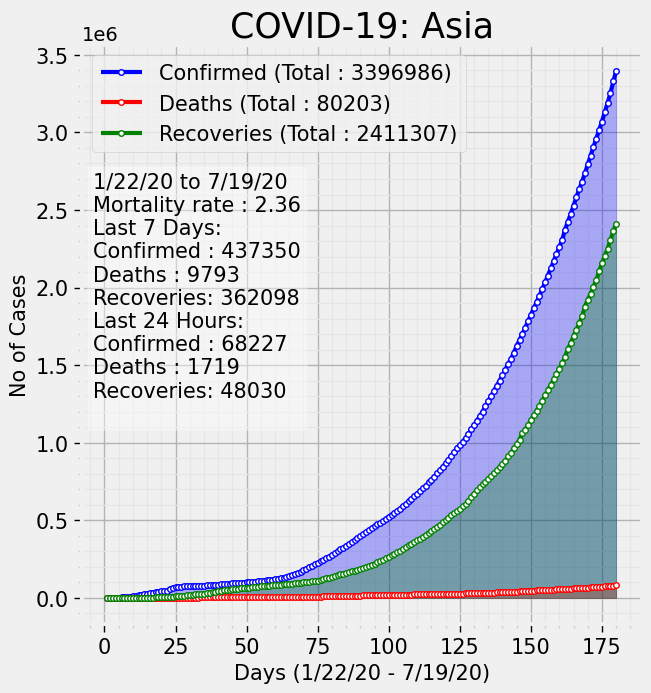

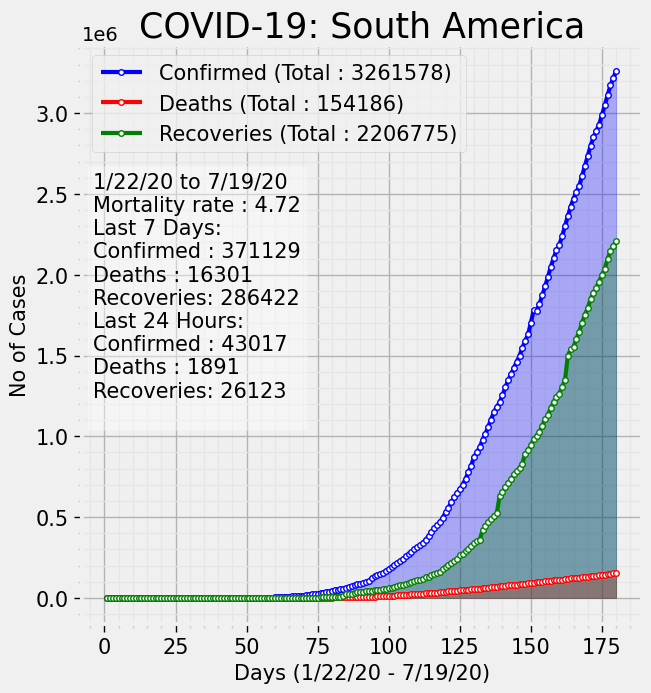

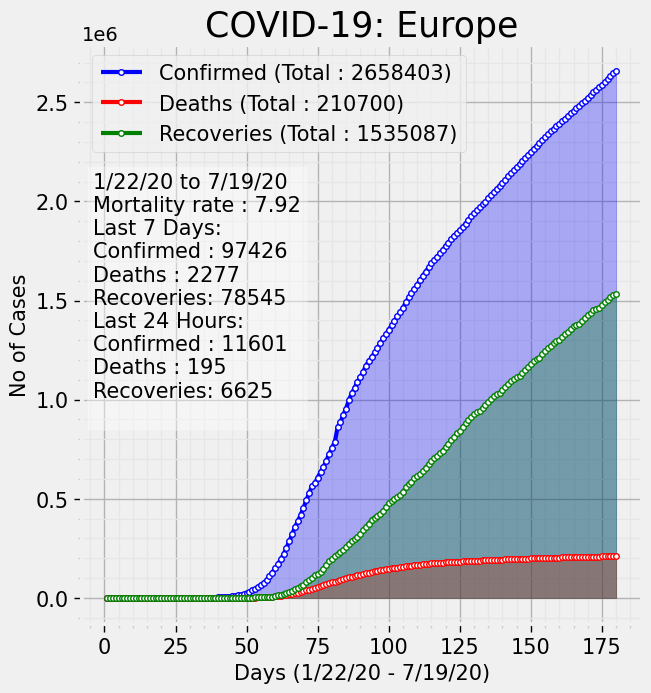

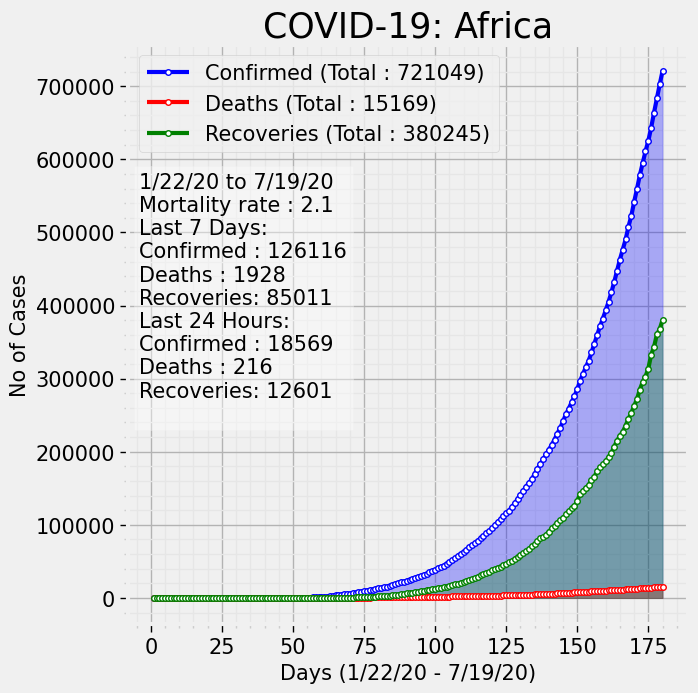

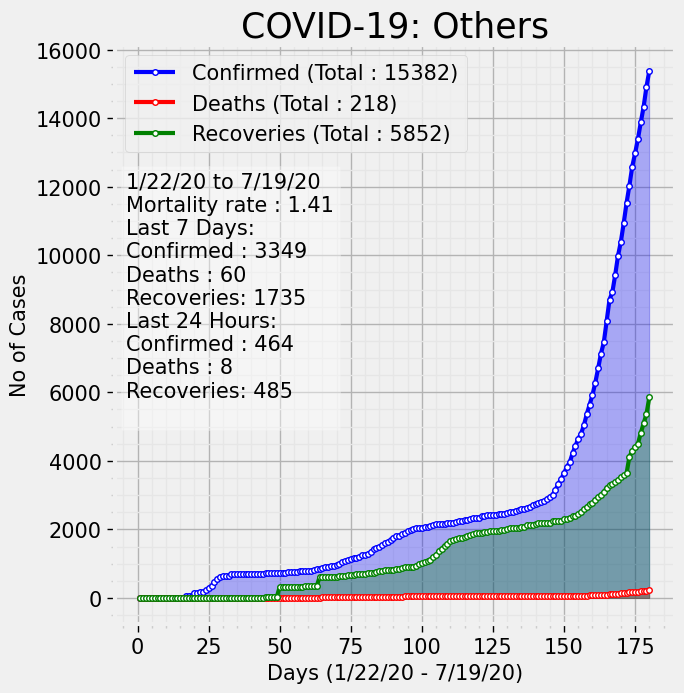

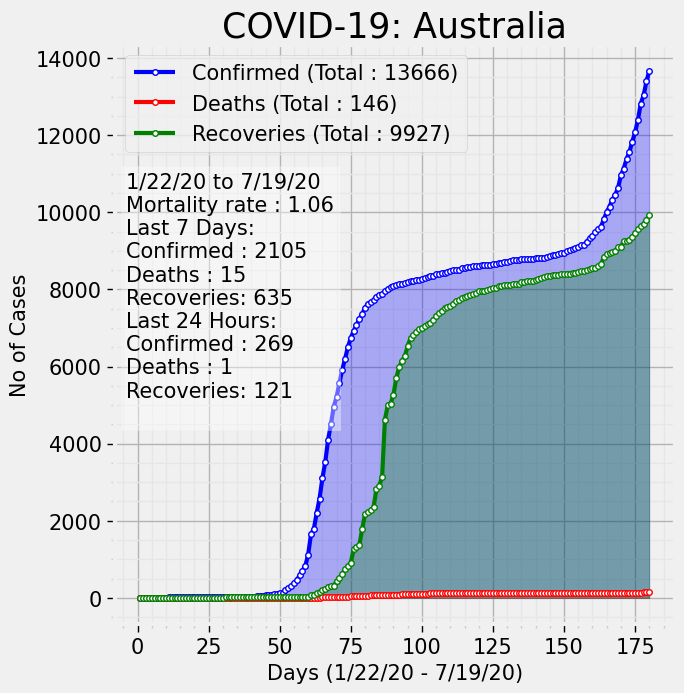

In [43]:
#Insert your code here:
def modified_plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def modified_visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries_df]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["Continent",continent]
    elif country != None:
        params = ["Country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(abs(Total_confirmed[-1] - Total_confirmed[-8]))+"\n"
    text += "Deaths : " + str(abs(Total_deaths[-1] - Total_deaths[-8]))+"\n"
    text += "Recoveries: " + str(abs(Total_recoveries[-1] - Total_recoveries[-8]))+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(abs(Total_confirmed[-1] - Total_confirmed[-2]))+"\n"
    text += "Deaths : " + str(abs(Total_deaths[-1] - Total_deaths[-2]))+"\n"
    text += "Recoveries: " + str(abs(Total_recoveries[-1] - Total_recoveries[-2]))+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    modified_plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def input_modified_visualize_covid_cases(continent: list):
    for i in range(len(continent)):
        modified_visualize_covid_cases(confirmed_df, deaths_df, continent[i][1])
        
input_modified_visualize_covid_cases(sort_confirmed_cases(confirmed_df))

# Problem 12
    Visualize the correlation matrix for continents_df.

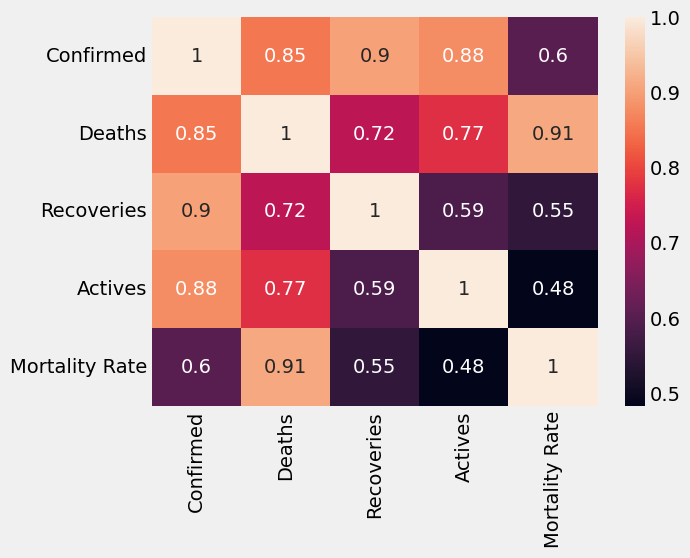

In [23]:
#Insert your code here:
sns.heatmap(continents_df[["Confirmed", "Deaths", "Recoveries", "Actives", "Mortality Rate"]].corr(), annot = True)
plt.show()

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

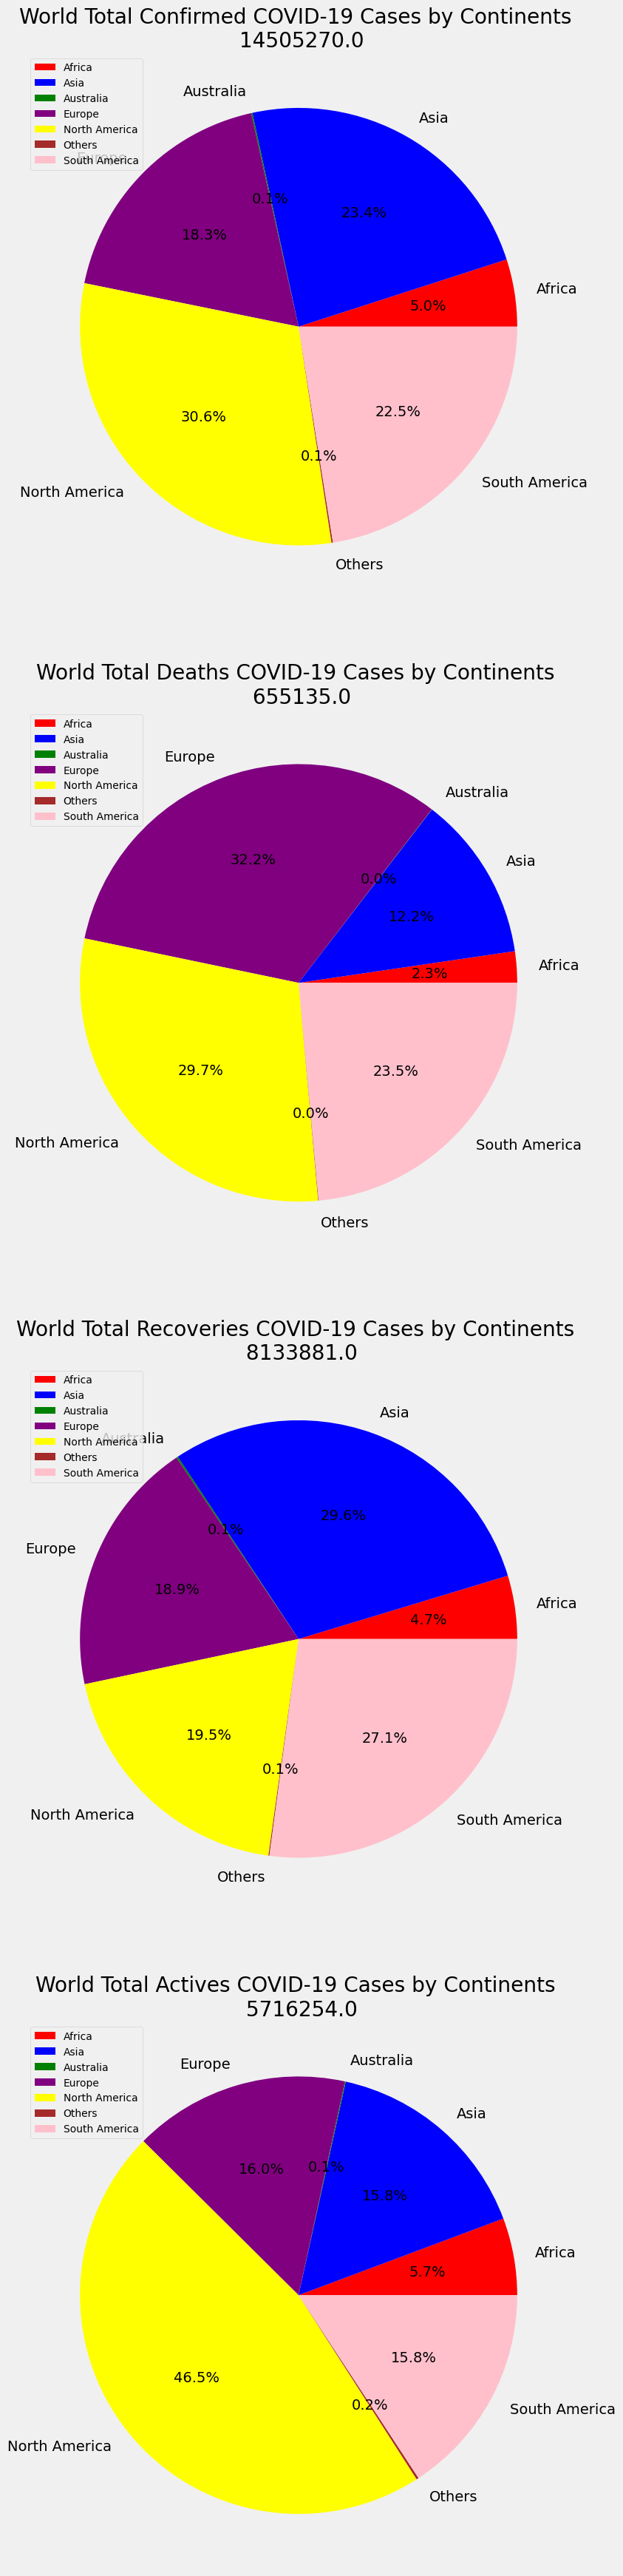

In [82]:
#Insert your code here:
figure, axis = plt.subplots(4, 1, figsize = (10, 6*7))

args = ["Confirmed", "Deaths", "Recoveries", "Actives"]
continent_name = ['Africa', 'Asia', 'Australia', 'Europe', 'North America', 'Others', 'South America']
color = ["red", "blue", "green", "purple", "yellow", "brown", "pink"]
def func(pct):
  return "{:1.1f}%".format(pct)

for i, arg in enumerate(args):
    temp_list = []
    axis[i].set_title(f"World Total {arg} COVID-19 Cases by Continents \n {continents_df[arg].sum()}")
    for j, con_name in enumerate(continent_name):
        sel_con_df = continents_df.loc[[con_name]]
        temp_list.append(sel_con_df[arg].sum())
    axis[i].pie(temp_list, labels = continent_name, autopct=lambda pct: func(pct), colors = color)
    axis[i].legend(loc = "upper left", prop={'size': 10})

# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [25]:
#Insert your code here:

confirmedFolium_df = countries_df.copy(deep = True)
confirmedFolium_df.reset_index(inplace = True)

confirmedFolium_df.replace('USA', "United States of America", inplace = True)
confirmedFolium_df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
confirmedFolium_df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
confirmedFolium_df.replace('Congo', "Republic of the Congo", inplace = True)
confirmedFolium_df.replace('Lao', "Laos", inplace = True)
confirmedFolium_df.replace('Syrian Arab Republic', "Syria", inplace = True)
confirmedFolium_df.replace('Serbia', "Republic of Serbia", inplace = True)
confirmedFolium_df.replace('Czechia', "Czech Republic", inplace = True)
confirmedFolium_df.replace('UAE', "United Arab Emirates", inplace = True)
confirmedFolium_df.dropna(axis = 0, inplace = True, subset = ["Lat", "Long"])

covid_folium = folium.Map()
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

color_linear = cm.LinearColormap(["green", "red"], vmin=confirmedFolium_df["Confirmed"].min(), vmax=confirmedFolium_df["Confirmed"].max())

for i in range(len(confirmedFolium_df)):
    country_name = confirmedFolium_df.at[confirmedFolium_df.index[i], "Country/Region"]
    confirmed = confirmedFolium_df.at[confirmedFolium_df.index[i], "Confirmed"]
    recoveries = confirmedFolium_df.at[confirmedFolium_df.index[i], "Recoveries"]
    deaths = confirmedFolium_df.at[confirmedFolium_df.index[i], "Deaths"]
    mor_rate = confirmedFolium_df.at[confirmedFolium_df.index[i], "Mortality Rate"] 
    
    html = f'''<font size="-1"><b>{country_name}</b><br>
    <font size="-2"><b>Confirmed:</b> {confirmed}<br>
    <b>Recoveries:</b> {recoveries}<br>
    <b>Deaths:</b> {deaths}<br>
    <b>Mortality Rate:</b> {mor_rate}'''

    iframe = folium.IFrame(html=html, width=300, height=100)
    
    folium.Circle(location = [confirmedFolium_df.iloc[i].Lat, confirmedFolium_df.iloc[i].Long],
                 popup = folium.Popup(iframe, min_width = 100, max_width = 2650),
                 radius = float(confirmedFolium_df.at[confirmedFolium_df.index[i], "Confirmed"])/2,
                 color = color_linear(confirmedFolium_df.at[confirmedFolium_df.index[i], "Confirmed"]),
                 weight = 1,
                fill = True).add_to(covid_folium)
    
    
covid_folium

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [26]:
#Insert your code here:

mapCountries_df = countries_df.copy(deep = True)
mapCountries_df.rename(index={'USA':'United States of America'}, inplace=True)
mapCountries_df.rename(index={"Côte d'Ivoire":'Ivory Coast'}, inplace=True)
mapCountries_df.reset_index(inplace = True)

url = (
    "https://raw.githubusercontent.com/datasets/geo-countries/master/data"
)

countries_geo = f"{url}/countries.geojson"

fig = px.choropleth_mapbox(countries_df, geojson=countries_geo,
                           featureidkey = 'properties.ADMIN',
                           locations = mapCountries_df["Country/Region"].values,
                           color=mapCountries_df["Actives"].values,
                           color_continuous_scale="Spectral",
                           range_color=(0, np.max(mapCountries_df["Actives"])),
                           zoom = 1,
                           labels={'Actives':'Active Case of Covid'},
                           mapbox_style = 'open-street-map'
                          )

fig.show()

# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [27]:
#Insert your code here:

top10_confirmed_df = countries_df.sort_values('Confirmed', ascending = False).head(10)
print(top10_confirmed_df)

                      Lat        Long      Continent  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America    3767602  141197   
Brazil         -14.235000  -51.925300  South America    2101399   79578   
India           20.593684   78.962880           Asia    1118206   27497   
Russia          61.524010  105.318756         Europe     770311   12323   
South Africa   -30.559500   22.937500         Africa     364328    5033   
Peru            -9.190000  -75.015200  South America     353590   49429   
Mexico          23.634500 -102.552800  North America     344224   39184   
Chile          -35.675100  -71.543000  South America     330930    8503   
United Kingdom  55.378100   -3.436000         Europe     294792   57023   
Iran            32.427908   53.688046           Asia     273788   14188   

                Recoveries  Actives  Mortality Rate  
Country/Region                               

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [28]:
fig = go.Figure(data=[
    go.Bar(name='Actives', x=top10_confirmed_df.index, y=top10_confirmed_df["Actives"].values),
    go.Bar(name='Recoveries', x=top10_confirmed_df.index, y=top10_confirmed_df["Recoveries"].values),
    go.Bar(name='Deaths', x=top10_confirmed_df.index, y=top10_confirmed_df["Deaths"].values),
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.update_yaxes(type="log")
fig.show()


# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

I don't think COVID 2019 epidemic has reached its peak just yet.
Based on the daily increase of total confirmed cases, we can see that the daily increase keeps increasing after each day. With the total cases refuses to windle down, it seems like the COVID-19 epidemic will prolong more for a whlie.

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


19.1. Europe

19.2. Australia

19.3. Australia

# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

20.1. Yemen

20.2. Namibia

20.3. Timor-Leste, Laos, Holy See, Grenada

# Problem 21
**USA dataset**

In [29]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

21.1. Connecticut

21.2. Massachusetts 

21.3. Minnesota

# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [200]:
#Insert your code here:
us_medical_data = us_medical_data.dropna(subset=["Deaths", "Recovered", "Active"], axis=0)
top10_medical_data = us_medical_data.sort_values('Confirmed', ascending = False).head(10)

X = us_medical_data[["Deaths", "Recovered", "Active"]].values
y = us_medical_data["Confirmed"]

regr = linear_model.LinearRegression()
regr.fit(X, y) 

for i in range(len(top10_medical_data)):
    print(top10_medical_data.iloc[i].Confirmed,
          np.round(regr.predict([[top10_medical_data.iloc[i].Deaths, top10_medical_data.iloc[i].Recovered, top10_medical_data.iloc[i].Active]])[0], 0))

397649 397803.0
204710 204623.0
174766 174888.0
110137 109969.0
101455 101716.0
94439 94357.0
74775 74801.0
73267 73224.0
69904 70105.0
66327 66358.0
